# Aufgabe 11
## Aufgabe 11.1
__Aufgabe:__ Implementieren Sie Vorwärts- und Rückwärtselimination.

Zunächst die Vorwärtselimination:

In [1]:
from numpy import array, tril, diagonal, zeros, arange

In [2]:
def vorwaertselimination(L,b):
    # Überprüfen ob Matrix und Vektor die gewünschte Form haben:
    n,m =L.shape
    k=max(b.shape)
    if not((n==m) & (n==k)):
        print('Dimensionen passen nicht zusammen')
        return None 
    if not((L==tril(L)).all()):
        print('Matrix ist nicht vom passenden Dreieckstyp.')
        return None
    if (diagonal(L)==0).any():
        print('Matrix ist singulär')
        return None
    
    # Start des Algorithmus:
    x=zeros(max(b.shape))
    for iii in range(n):
        l=L[iii,:]
        x[iii]=(b[iii]-l@x)/L[iii,iii]
        
    return x

Test mit einem Beispiel in dem erst $b=L\cdot x$ berechnet wird und dann mit L,b getestet wird:

In [3]:
L=array([[1,0,0],[1,2,0],[1,3,1]])
x=array([1,2,3])
b=L@x 
vorwaertselimination(L,b)

array([ 1.,  2.,  3.])

Die Rückwärtselimination wird jetzt so geschrieben, dass sie die Vorwärtselimination aufruft, der das Gleichungssystem "von unten gelesen" übergeben wird.

In [4]:
def rueckwaertselimination(U,b):
    n,m= U.shape
    rueckwaerts=arange(n-1,-1,-1)
    z=vorwaertselimination(U[rueckwaerts,:][:,rueckwaerts],b[rueckwaerts])
    if z==None:
        return None
    else:
        return z[rueckwaerts]

In [5]:
U=array([[1,2,3],[0,2,1],[0,0,1]])
c=U@x 
rueckwaertselimination(U,c)

/opt/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:5: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


array([ 1.,  2.,  3.])

## Aufgabe 11.2
__Aufgabe:__ Implementieren Sie die Cholesky Zerlegung

In [6]:
def cholesky(A):
    # Test ob Matrix quadratisch ist
    n,m = A.shape
    if not(n==m):
        print('Matrix ist nicht quadratisch')
        return None
    # Test ob Matrix hermitesch ist
    if not((A==A.T.conj()).all()):
        print('Matrix ist nicht hermitesch')
        return None
    # Es gibt keine kluge Variante im Vorfeld festzustellen, ob die Matrix A positiv definit ist. Das
    # "ergibt" sich im Laufe der Zerlegung. Jede Variante das festzustellen (z.B. Eigenwerte bestimmen)
    # dauert etwa genauso lange wie den Algorithmus selbst durchzuführen.
    
    for kkk in range(n):
        A[kkk,kkk]=A[kkk,kkk]-A[kkk,:kkk]@A[kkk,:kkk].conj()
        if A[kkk,kkk]>0:
            A[kkk,kkk]=A[kkk,kkk]**(1/2)
        else:
            print('Matrix ist nicht positiv definit')
            return None
        A[kkk+1:,kkk]=(A[kkk+1:,kkk]-A[kkk+1:,:kkk]@ A[kkk,:kkk].conj())/A[kkk,kkk]
    return A

Testen der Zerlegung, indem wir zunächst eine positiv definite Matrix per $A=LL^*$ konstruieren und zeigen, dass die Zerlegung L zurück gibt.

In [7]:
L=array([[2,0,0],[1j,2,0],[-1j,2,3]])*1.0
A=L@L.T.conj()
B=cholesky(A.copy())
print(tril(B)-L)

[[  0.00000000e+00+0.j   0.00000000e+00+0.j   0.00000000e+00+0.j]
 [  0.00000000e+00+0.j   0.00000000e+00+0.j   0.00000000e+00+0.j]
 [  0.00000000e+00+0.j   0.00000000e+00+0.j   4.44089210e-16+0.j]]


## Aufgabe 11.3
__Aufgabe:__ Lösen Sie zu gegebener rechter Seite die 2d Poissongleichung

Zunächst kopieren wir die Funktion von Blatt 2 die die Matrix erstellt.

In [8]:
from numpy import eye

def tridiag(a,b,c,n):
    A=zeros([n,n]) 
    for iii in range(n):
        if iii==0:
            A[iii,iii]=b 
            A[iii,iii+1]=c
        elif iii==n-1:
            A[iii,iii]=b
            A[iii,iii-1]=a
        else:
            A[iii,iii]=b
            A[iii,iii-1]=a
            A[iii,iii+1]=c
    return A

def poisson2d_matrix(n):
    A=zeros([(n-1)**2,(n-1)**2]) # Hier speichern wie die Poissonmatrix rein
    B=tridiag(-1,4,-1,n-1) # Die Matrix entlang der Diagonalen
    C=-eye(n-1) # Die Matrix auf den Matrixnebendiagonalen
    # Jetzt bauen wir Matrix nach dem selben Prinzip zusammen, wie in tridiag:
    for iii in range(n-1): # für "blockweise" durchlaufen der Matrix
        ind=iii*(n-1) # Umrechnen von Blockindex zu Matrixindex
        A[ind:ind+(n-1),ind:ind+n-1]=B #Setzen des Diagonalblocks
        # Setzen der Nebendiagonalblöcke
        if iii==0:
            A[ind:ind+(n-1),ind+(n-1):ind+2*(n-1)]=C
        elif iii==n-2:
            A[ind:ind+(n-1),ind-(n-1):ind]=C
        else:
            A[ind:ind+(n-1),ind+(n-1):ind+2*(n-1)]=C
            A[ind:ind+(n-1),ind-(n-1):ind]=C
    return n**2*A

In [9]:
from numpy import array,zeros,ogrid,broadcast_arrays

def rechte_seite(n):
    rechteSeite=zeros([n-1,n-1])
    x,y=ogrid[1/n:1-1/n:(n-1)*1j,1/n:1-1/n:(n-1)*1j]
    x, y = broadcast_arrays(x, y)
    rechteSeite[(1/8<=x) & (x<=1/4) & (1/8<=y) & (y<=5/8)]=2
    rechteSeite[(1/8<=y) & (y<=1/4) & (1/8<=x) & (x<=5/8)]=2
    z=(x-2/3)**2+(y-2/3)**2
    rechteSeite[z<=1/16]=-1
    return rechteSeite.ravel()

Bevor wir die Gleichung lösen, plotten wir zunächst einmal die rechte Seite als Bild


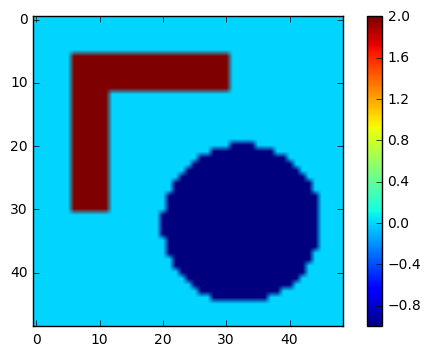

In [10]:
import matplotlib.pyplot as plt

n=50
x=rechte_seite(n)
x=x.reshape(n-1,n-1)
plt.imshow(x)
plt.colorbar()
plt.show()

Jetzt, lösen der Gleichung und anschließend plotten des Bildes:

/opt/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:5: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


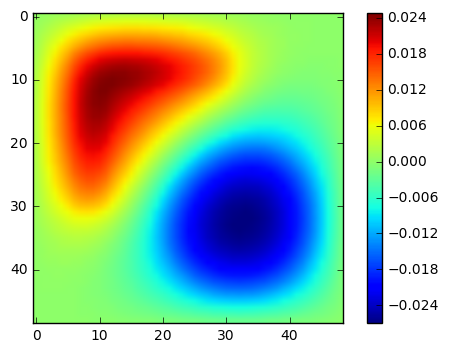

In [11]:
n=50
x=rechte_seite(n)
A=poisson2d_matrix(n)

L=tril(cholesky(A))
u=rueckwaertselimination(L.T.conj(),vorwaertselimination(L,x))
u=u.reshape(n-1,n-1)
plt.imshow(u)
plt.colorbar()
plt.show()